In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/fraud_detection/Fraud.csv')

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:

data.duplicated().sum()

0

In [ ]:
data.shape

(6362620, 11)

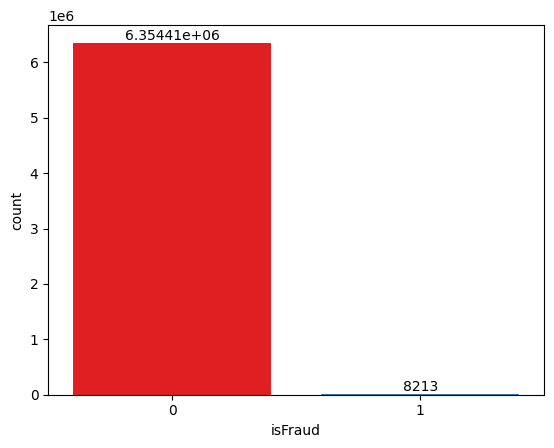

In [ ]:
ax=sns.countplot(x=data['isFraud'],data=data,palette ='Set1',saturation=0.95)
for container in ax.containers:
    ax.bar_label(container,color='black',size=10)

In [ ]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

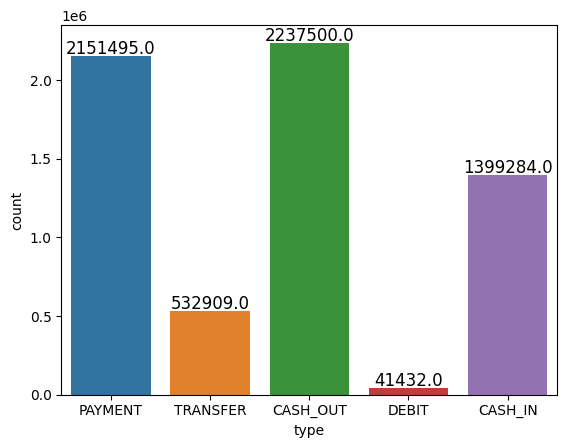

In [ ]:
ax=sns.countplot(x=data['type'],data=data)
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

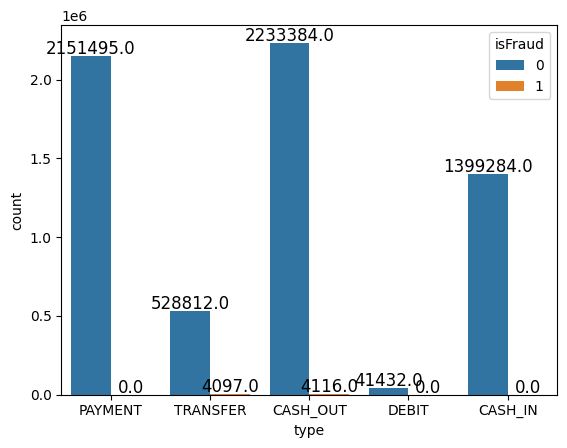

In [ ]:
ax = sns.countplot(x=data['type'], data=data,hue=data['isFraud'])


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

From the plot we can tell that if type is PAYMENT or CASH_IN we can 100% say that it is not Fraud.Finally we can drop those Rows

In [ ]:
name_orig_set = set(data['nameOrig'])
name_dest_set = set(data['nameDest'])

In [ ]:
data[data['isFlaggedFraud']==1]['isFlaggedFraud'].sum()

16

The total isFlaggedFraud are 16 only

In [ ]:
data[data['isFraud']==1]['isFraud'].sum()

8213

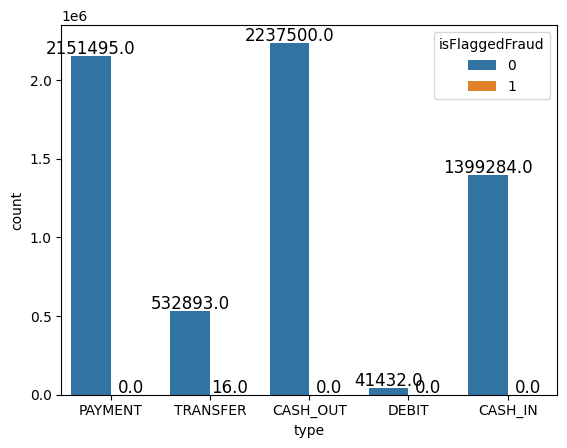

In [ ]:
ax=sns.countplot(x=data['type'],data=data,hue=data['isFlaggedFraud'])
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

The all 16 isFlaggedFraud are transfers

In [ ]:
data[data['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


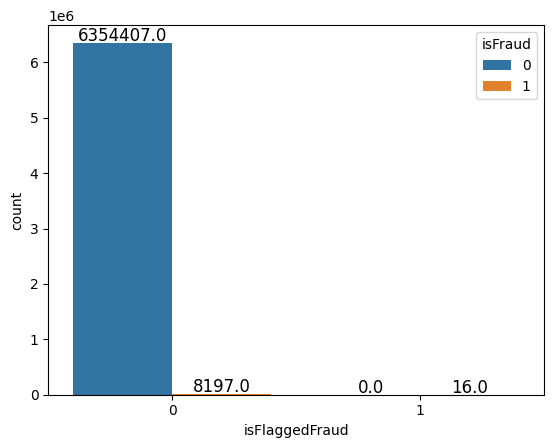

In [ ]:
ax=sns.countplot(x=data['isFlaggedFraud'],data=data,hue=data['isFraud'])
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

The all 16 IsFlaggedFraud are Fraud.If isFlaggedFraud==1 then we can directly say that it is Fraud

Categorizing the amount to better analyze

In [ ]:

bin_edges = [0, 10000, 50000, 100000, 500000, float('inf')]

data['amount_category'] = np.digitize(data['amount'], bins=bin_edges, right=True)

bin_labels = ['0-10k', '10k-50k', '50k-100k', '100k-500k', '500k+']
data['amount_category'] = data['amount_category'].map(lambda x: bin_labels[x - 1] if 0 < x <= len(bin_labels) else 'Invalid')

print(data[['amount', 'amount_category']].head())


     amount amount_category
0   9839.64           0-10k
1   1864.28           0-10k
2    181.00           0-10k
3    181.00           0-10k
4  11668.14         10k-50k


In [ ]:
data.loc[data['amount'] == 0, 'amount_category'] = '0'

In [ ]:
data['amount_category'].unique()

array(['0-10k', '10k-50k', '100k-500k', '50k-100k', '500k+', '0'],
      dtype=object)

In [ ]:
data[data['amount']==0.0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_category
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0,0


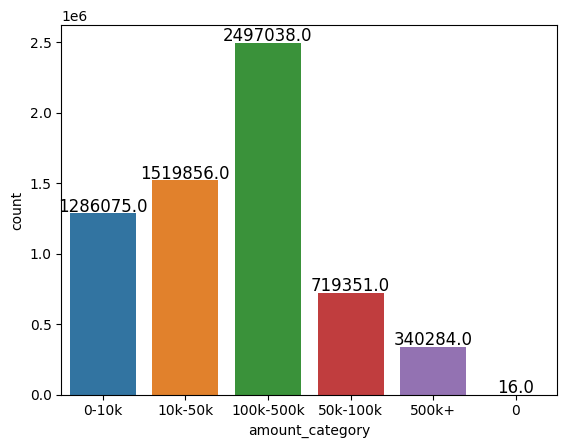

In [ ]:
ax=sns.countplot(x=data['amount_category'],data=data)
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width() /2 ,p.get_height()),ha='center',va='center',fontsize=12,color='black',xytext=(0,5),textcoords='offset points')

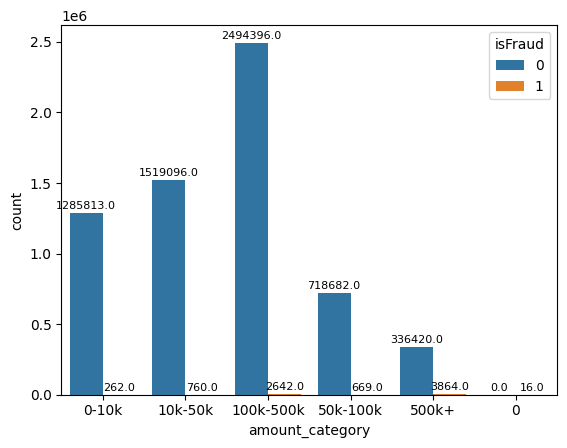

In [ ]:
ax=sns.countplot(x=data['amount_category'],data=data,hue=data['isFraud'])
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width() /2 ,p.get_height()),ha='center',va='center',fontsize=8,color='black',xytext=(0,5),textcoords='offset points')
  #ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

when amount==0.0 then it is Fraud transcation

In [ ]:
data.nlargest(100,'amount')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_category
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0,500k+
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0,500k+
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0,500k+
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0,500k+
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0,500k+
...,...,...,...,...,...,...,...,...,...,...,...,...
4149527,303,TRANSFER,42183808.56,C1835360608,266493.9,0.0,C8271807,6.780774e+07,1.099915e+08,0,0,500k+
4053230,300,TRANSFER,41988600.77,C55478598,0.0,0.0,C60911281,6.457754e+07,1.407997e+08,0,0,500k+
3750972,279,TRANSFER,41963708.15,C1237771660,0.0,0.0,C947086614,8.409592e+07,1.260596e+08,0,0,500k+
4061245,300,TRANSFER,41818052.20,C1011191693,0.0,0.0,C880754345,9.606096e+07,1.378790e+08,0,0,500k+


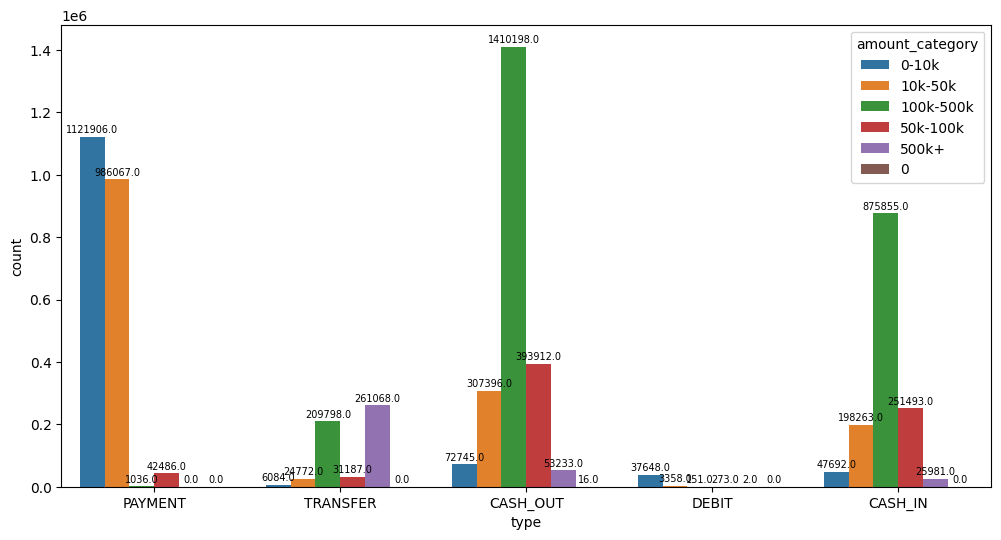

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x=data['type'],data=data,hue=data['amount_category'])
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width() /2 ,p.get_height()),ha='center',va='center',fontsize=7,color='black',xytext=(0,5),textcoords='offset points')
plt.show()

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_category'],
      dtype='object')

In [ ]:
data.shape

(6362620, 12)

In [ ]:
data.nunique()

step                   743
type                     5
amount             5316900
nameOrig           6353307
oldbalanceOrg      1845844
newbalanceOrig     2682586
nameDest           2722362
oldbalanceDest     3614697
newbalanceDest     3555499
isFraud                  2
isFlaggedFraud           2
amount_category          6
dtype: int64

In [ ]:
x=data['nameOrig'].isin(data['nameDest'])
x_data=data[x]

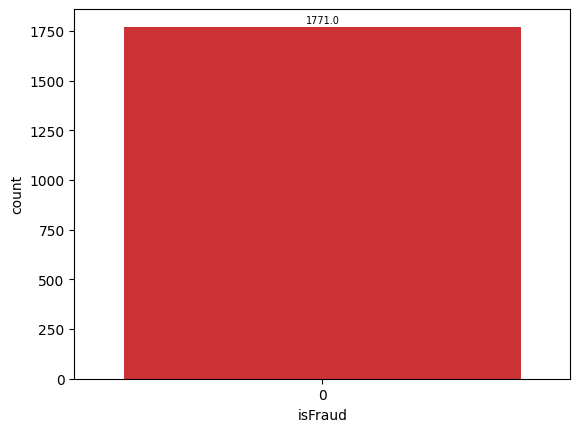

In [ ]:
ax=sns.countplot(x=x_data['isFraud'],data=x_data,palette='Set1')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width() /2 ,p.get_height()),ha='center',va='center',fontsize=7,color='black',xytext=(0,5),textcoords='offset points')

**So If nameOrig account is in nameDest then we can consider it 100% as not fraud transaction**

In [ ]:
y=data['nameDest'].isin(data['nameOrig'])
y_data=data[y]

In [ ]:
y_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_category
559,1,TRANSFER,100588.80,C1636588948,18913.68,0.00,C2050019814,105223.00,0.00,0,0,100k-500k
862,1,CASH_OUT,171757.76,C1673916398,0.00,0.00,C2050019814,205811.80,0.00,0,0,100k-500k
1262,1,CASH_IN,35492.20,C1540476618,444567.92,480060.12,C2050019814,377569.57,0.00,0,0,10k-50k
1307,1,CASH_IN,82564.24,C322830747,6739112.35,6821676.59,C2050019814,342077.36,0.00,0,0,50k-100k
1321,1,CASH_IN,170207.14,C1816468636,8335475.31,8505682.45,C2050019814,259513.13,0.00,0,0,100k-500k
...,...,...,...,...,...,...,...,...,...,...,...,...
6360310,715,CASH_OUT,132690.16,C1171142639,20341.00,0.00,C403452664,2818573.23,2951263.38,0,0,100k-500k
6360417,715,CASH_IN,176520.26,C1854803263,380679.00,557199.26,C1926045395,40235.33,0.00,0,0,100k-500k
6361938,718,TRANSFER,190631.38,C1057333627,11297.00,0.00,C1266674210,457089.99,647721.37,0,0,100k-500k
6362433,728,CASH_OUT,6322399.97,C1305559146,6322399.97,0.00,C2086292862,0.00,6322399.97,1,0,500k+


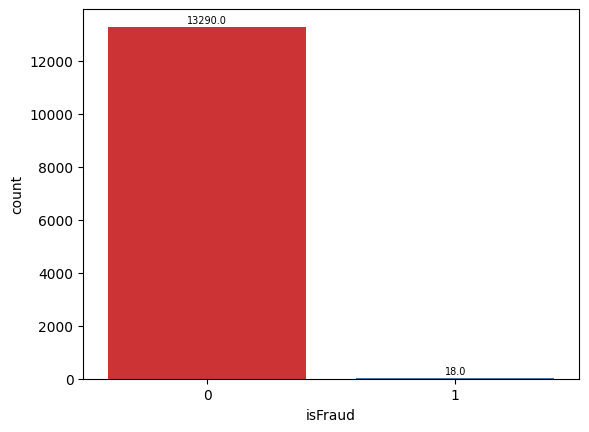

In [ ]:
ax=sns.countplot(x=y_data['isFraud'],data=y_data,palette='Set1')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width() /2 ,p.get_height()),ha='center',va='center',fontsize=7,color='black',xytext=(0,5),textcoords='offset points')

So If nameDest account is in nameOrig then we can consider it as not fraud transaction.Ignore 18 values as it small value

In [ ]:
types_to_drop = ['PAYMENT', 'CASH_IN', 'DEBIT']
ddata = data.drop(data[data['type'].isin(types_to_drop)].index)

Since PAYMENT CASHIN DEBIT ARE NOT FRAUD WE CAN DROP ANALYAZE DATA FURTHER

In [ ]:
ddata.shape

(2770409, 12)

In [ ]:
ddata['nameDest'].value_counts().sort_values(ascending=False).head(50)

C1286084959    75
C1360767589    68
C665576141     68
C97730845      67
C248609774     64
C2083562754    63
C2006081398    63
C1789550256    62
C1590550415    62
C985934102     61
C306206744     61
C1023714065    61
C1255024717    60
C977993101     60
C991363637     59
C1759482496    58
C801142660     57
C1234776885    57
C909295153     57
C1303868418    57
C716083600     56
C453211571     56
C998351292     55
C392292416     55
C991505714     55
C1899073220    55
C2049813033    55
C728526866     55
C803116137     55
C1909597726    54
C451111351     54
C1674899618    54
C1782113663    54
C214774813     53
C1262822392    53
C339099861     53
C1359484306    53
C863811613     53
C423580937     53
C1501701470    53
C40075281      52
C667346055     52
C2040603986    52
C1876351111    52
C1013700132    51
C766681183     51
C232812328     51
C1161865950    51
C11003494      51
C662736689     51
Name: nameDest, dtype: int64

In [ ]:
plotdata=data['nameOrig'].value_counts().sort_values(ascending=False)

In [ ]:
plotdata

C1902386530    3
C2098525306    3
C363736674     3
C1530544995    3
C1065307291    3
              ..
C2043347152    1
C1317912992    1
C1896823979    1
C95254583      1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [ ]:
plotdata=plotdata[plotdata>1]

In [ ]:
plotdata.sum()

18611

In [ ]:
top_name_dest = plotdata.index

filtered_data2 = data[data['nameOrig'].isin(top_name_dest)]

In [ ]:
filtered_data2[filtered_data2['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_category
217321,13,CASH_OUT,6188514.81,C686187434,6188514.81,0.0,C1562904239,381607.21,6424681.56,1,0,500k+
646015,35,CASH_OUT,171788.82,C432562518,171788.82,0.0,C1529736160,19962.00,0.00,1,0,100k-500k
788647,39,TRANSFER,152042.16,C1118399210,152042.16,0.0,C104038589,0.00,0.00,1,0,100k-500k
1059491,98,CASH_OUT,63624.08,C431038121,63624.08,0.0,C1925188324,0.00,63624.08,1,0,50k-100k
1496506,142,TRANSFER,346374.54,C171834973,346374.54,0.0,C1249377837,0.00,0.00,1,0,100k-500k
2197236,185,CASH_OUT,164213.17,C803411135,164213.17,0.0,C1325722809,1681702.11,1845915.27,1,0,100k-500k
2516796,205,TRANSFER,566156.42,C1498185758,566156.42,0.0,C1639518321,0.00,0.00,1,0,500k+
2531840,205,TRANSFER,216179.15,C1863683348,216179.15,0.0,C1011918912,0.00,0.00,1,0,100k-500k
3193184,243,CASH_OUT,1290193.08,C876181265,1290193.08,0.0,C24324787,0.00,1290193.08,1,0,500k+
3610975,269,TRANSFER,676882.33,C1627918307,676882.33,0.0,C1636966593,0.00,0.00,1,0,500k+


In [ ]:
plotdata=data['nameDest'].value_counts().sort_values(ascending=False)

In [ ]:
plotdata

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1474061848      1
M127209230       1
M523536771       1
M1872872398      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [ ]:
plotdata.sum()

6362620

In [ ]:
fraud_counts_by_name_dest = data[data['isFraud'] == 1]['nameDest'].value_counts()


In [ ]:
fraud_counts_by_name_dest

C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

In [ ]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)

DATA CLEANING

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/fraud_detection/Fraud.csv')

In [ ]:
d1=data.shape[0]
d1

6362620

In [ ]:
data[data['isFraud']==1].shape[0]

8213

In [ ]:
name_orig_set = set(data['nameOrig'])
name_dest_set = set(data['nameDest'])

If nameOrig are present in nameDest then we can drop those rows .proved in analysis part

In [ ]:

y = data['nameOrig'].isin(name_dest_set)

# Filter out the rows where 'isFraud' is equal to 0
p_data = data[y]


In [ ]:
data2 = data.drop(p_data.index)

In [ ]:
data2[data2['isFraud']==1].shape[0]

8213

The isFraud==1 values are not changed after dropping also

In [ ]:
d2=data2.shape[0]
print('number of rows after removing : ',d2)

number of rows after removing :  6360849


In [ ]:
print('number of rows reduced: ',d1-d2)

number of rows reduced:  1771


In [ ]:
data3=data2[data2['isFlaggedFraud']!=1]

In [ ]:
d3=data3.shape[0]
print('number of rows after removing isFlaggedFraud: ',d3)

number of rows after removing isFlaggedFraud:  6360833


In [ ]:
print('number of rows reduced ',d2-d3)

number of rows reduced  16


Droping if rows if type is PAYMENT OR CASH_IN OR DEBIT as it always not Fraud.proved through analysis above

In [ ]:
types_to_drop = ['PAYMENT', 'CASH_IN', 'DEBIT']

data4 = data3.drop(data3[data3['type'].isin(types_to_drop)].index)

In [ ]:
d4=data4.shape[0]
print('number of rows after removing: ',d4)

number of rows after removing:  2769634


In [ ]:
print('number of rows reduced : ',d3-d4)

number of rows reduced :  3591199


In [ ]:
data4.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
data4.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
#data4.drop('newbalanceOrig',axis=1,inplace=True)

newbalanceOrig is related with amount and nameOrig so we can drop it.oldbalancOrg-amount=newbalanceOrd

In [ ]:
data4.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
data4.reset_index(drop=True,inplace=True)

In [ ]:
data4.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
1,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
2,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
3,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
4,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [ ]:
data4[data4['amount']==0]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1204649,212,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1
1421807,250,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1
1646149,279,CASH_OUT,0.0,0.0,0.0,538547.63,538547.63,1
2427768,387,CASH_OUT,0.0,0.0,0.0,7970766.57,7970766.57,1
2618424,425,CASH_OUT,0.0,0.0,0.0,76759.90,76759.90,1
2618425,425,CASH_OUT,0.0,0.0,0.0,2921531.34,2921531.34,1
2687948,554,CASH_OUT,0.0,0.0,0.0,230289.66,230289.66,1
2703073,586,CASH_OUT,0.0,0.0,0.0,1328472.86,1328472.86,1
2728805,617,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1
2735246,646,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1


In [ ]:
data4[(data4['oldbalanceOrg']==0.0) & (data4['newbalanceOrig']==0)] #1308218

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
7,1,CASH_OUT,5346.89,0.0,0.0,652637.00,6453430.91,0
15,1,TRANSFER,77957.68,0.0,0.0,94900.00,22233.65,0
16,1,TRANSFER,17231.46,0.0,0.0,24672.00,0.00,0
17,1,TRANSFER,78766.03,0.0,0.0,103772.00,277515.05,0
18,1,TRANSFER,224606.64,0.0,0.0,354678.92,0.00,0
...,...,...,...,...,...,...,...,...
2766519,709,CASH_OUT,244966.80,0.0,0.0,5254563.09,5499529.89,0
2766520,709,CASH_OUT,123403.11,0.0,0.0,606875.62,730278.74,0
2769477,730,CASH_OUT,0.00,0.0,0.0,1008609.53,1008609.53,1
2769478,730,CASH_OUT,0.00,0.0,0.0,0.00,0.00,1


In [ ]:
data4[((data4['newbalanceOrig'])==abs((data4['oldbalanceOrg'])-data4['amount'])) &(data4['newbalanceOrig'])]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
182,1,TRANSFER,7206.33,24932.00,17725.67,21308.00,18161.79,0
190,1,CASH_OUT,227768.63,1011466.31,783697.68,530123.48,1412484.09,0
191,1,CASH_OUT,172986.70,783697.68,610710.98,686295.71,1517262.16,0
420,1,CASH_OUT,139754.72,6000879.70,5861124.98,2474475.78,2719172.89,0
431,1,TRANSFER,81222.77,180207.00,98984.23,3243462.05,3461666.05,0
...,...,...,...,...,...,...,...,...
2769471,730,TRANSFER,10000000.00,47316255.05,37316255.05,0.00,0.00,1
2769475,730,TRANSFER,10000000.00,27316255.05,17316255.05,0.00,0.00,1
2769591,741,TRANSFER,10000000.00,45674547.89,35674547.89,0.00,0.00,1
2769593,741,TRANSFER,10000000.00,35674547.89,25674547.89,0.00,0.00,1


In [ ]:
data4[['oldbalanceOrg','oldbalanceDest','newbalanceDest','newbalanceOrig']]=data4[['oldbalanceOrg','oldbalanceDest','newbalanceDest','newbalanceOrig']].replace(0,np.nan)

In [ ]:
data4

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.00,NaN,NaN,NaN,1
1,1,CASH_OUT,181.00,181.00,NaN,21182.00,NaN,1
2,1,CASH_OUT,229133.94,15325.00,NaN,5083.00,51513.44,0
3,1,TRANSFER,215310.30,705.00,NaN,22425.00,NaN,0
4,1,TRANSFER,311685.89,10835.00,NaN,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
2769629,743,CASH_OUT,339682.13,339682.13,NaN,NaN,339682.13,1
2769630,743,TRANSFER,6311409.28,6311409.28,NaN,NaN,NaN,1
2769631,743,CASH_OUT,6311409.28,6311409.28,NaN,68488.84,6379898.11,1
2769632,743,TRANSFER,850002.52,850002.52,NaN,NaN,NaN,1


In [ ]:
data4.isnull().sum()

step                    0
type                    0
amount                  0
oldbalanceOrg     1308218
newbalanceOrig    2495965
oldbalanceDest     389211
newbalanceDest      16579
isFraud                 0
dtype: int64

In [ ]:
data4[(data4['oldbalanceOrg'].isnull()) & (data4['newbalanceOrig'].isnull())]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
7,1,CASH_OUT,5346.89,NaN,NaN,652637.00,6453430.91,0
15,1,TRANSFER,77957.68,NaN,NaN,94900.00,22233.65,0
16,1,TRANSFER,17231.46,NaN,NaN,24672.00,NaN,0
17,1,TRANSFER,78766.03,NaN,NaN,103772.00,277515.05,0
18,1,TRANSFER,224606.64,NaN,NaN,354678.92,NaN,0
...,...,...,...,...,...,...,...,...
2766519,709,CASH_OUT,244966.80,NaN,NaN,5254563.09,5499529.89,0
2766520,709,CASH_OUT,123403.11,NaN,NaN,606875.62,730278.74,0
2769477,730,CASH_OUT,0.00,NaN,NaN,1008609.53,1008609.53,1
2769478,730,CASH_OUT,0.00,NaN,NaN,NaN,NaN,1


In [ ]:
data4.loc[(data4['oldbalanceOrg'].isnull()) , 'oldbalanceOrg'] =data4['amount']

In [ ]:
data4.isnull().sum()

step                    0
type                    0
amount                  0
oldbalanceOrg           0
newbalanceOrig    2495965
oldbalanceDest     389211
newbalanceDest      16579
isFraud                 0
dtype: int64

In [ ]:
data4[(data4['newbalanceDest'].isnull()) & (data4['oldbalanceDest'].isnull())]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.00,NaN,NaN,NaN,1
123,1,TRANSFER,2806.00,2806.00,NaN,NaN,NaN,1
192,1,TRANSFER,20128.00,20128.00,NaN,NaN,NaN,1
324,1,TRANSFER,1277212.77,1277212.77,NaN,NaN,NaN,1
346,1,TRANSFER,35063.63,35063.63,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...
2769624,742,TRANSFER,63416.99,63416.99,NaN,NaN,NaN,1
2769626,743,TRANSFER,1258818.82,1258818.82,NaN,NaN,NaN,1
2769628,743,TRANSFER,339682.13,339682.13,NaN,NaN,NaN,1
2769630,743,TRANSFER,6311409.28,6311409.28,NaN,NaN,NaN,1


In [ ]:
data4.loc[(data4['newbalanceDest'].isnull()) & (data4['oldbalanceDest'].notna()),'newbalanceDest']=data4['amount']+data4['oldbalanceDest']

In [ ]:
data4.isnull().sum()

step                    0
type                    0
amount                  0
oldbalanceOrg           0
newbalanceOrig    2495965
oldbalanceDest     389211
newbalanceDest       5765
isFraud                 0
dtype: int64

In [ ]:
data4.loc[(data4['newbalanceDest'].isnull()) & (data4['oldbalanceDest'].isnull()),'newbalanceDest']=data4['amount']

In [ ]:
data4.isnull().sum()

step                    0
type                    0
amount                  0
oldbalanceOrg           0
newbalanceOrig    2495965
oldbalanceDest     389211
newbalanceDest          0
isFraud                 0
dtype: int64

since newbalanceOrig=oldbalanceOrg+amount annd oldbalanceDest=newbalanceDest-amount as A relation exits so it has no use 2 use variables

In [ ]:
data5=data4.drop(['oldbalanceDest','newbalanceOrig'],axis=1)

In [ ]:
data5.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
# from sklearn.impute import SimpleImputer

In [ ]:
# imputer = SimpleImputer(strategy='median')

In [ ]:
# imputer.fit(data4[['oldbalanceDest', 'newbalanceDest']])

SimpleImputer(strategy='median')

In [ ]:
data5

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.00,181.00,1
1,1,CASH_OUT,181.00,181.00,21363.00,1
2,1,CASH_OUT,229133.94,15325.00,51513.44,0
3,1,TRANSFER,215310.30,705.00,237735.30,0
4,1,TRANSFER,311685.89,10835.00,2719172.89,0
...,...,...,...,...,...,...
2769629,743,CASH_OUT,339682.13,339682.13,339682.13,1
2769630,743,TRANSFER,6311409.28,6311409.28,6311409.28,1
2769631,743,CASH_OUT,6311409.28,6311409.28,6379898.11,1
2769632,743,TRANSFER,850002.52,850002.52,850002.52,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
columns_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceDest']

In [ ]:
data5[columns_to_scale] = scaler.fit_transform(data4[columns_to_scale])

In [ ]:
data5

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud
0,1,TRANSFER,-0.357453,-0.258755,-0.438925,1
1,1,CASH_OUT,-0.357453,-0.258755,-0.434396,1
2,1,CASH_OUT,-0.099558,-0.239639,-0.427950,0
3,1,TRANSFER,-0.115129,-0.258093,-0.388133,0
4,1,TRANSFER,-0.006570,-0.245307,0.142429,0
...,...,...,...,...,...,...
2769629,743,CASH_OUT,0.024965,0.169772,-0.366336,1
2769630,743,TRANSFER,6.751586,7.707433,0.910493,1
2769631,743,CASH_OUT,6.751586,7.707433,0.925136,1
2769632,743,TRANSFER,0.599796,0.813911,-0.257223,1


MODEL BUILDING

In [ ]:
data5.to_csv(r'/content/drive/MyDrive/fraud_detection/preprocessed_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [ ]:
X=data5.drop('isFraud',axis=1)

In [ ]:
Y=data5['isFraud']

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceDest
0,1,TRANSFER,-0.357453,-0.258755,-0.438925
1,1,CASH_OUT,-0.357453,-0.258755,-0.434396
2,1,CASH_OUT,-0.099558,-0.239639,-0.427950
3,1,TRANSFER,-0.115129,-0.258093,-0.388133
4,1,TRANSFER,-0.006570,-0.245307,0.142429
...,...,...,...,...,...
2769629,743,CASH_OUT,0.024965,0.169772,-0.366336
2769630,743,TRANSFER,6.751586,7.707433,0.910493
2769631,743,CASH_OUT,6.751586,7.707433,0.925136
2769632,743,TRANSFER,0.599796,0.813911,-0.257223


In [ ]:
Y

0          1
1          1
2          0
3          0
4          0
          ..
2769629    1
2769630    1
2769631    1
2769632    1
2769633    1
Name: isFraud, Length: 2769634, dtype: int64

In [ ]:
X=pd.get_dummies(X,columns=['type'],drop_first=True)

In [ ]:
X

,step,amount,oldbalanceOrg,newbalanceDest,type_TRANSFER
0,1,-0.357453,-0.258755,-0.438925,1
1,1,-0.357453,-0.258755,-0.434396,0
2,1,-0.099558,-0.239639,-0.427950,0
3,1,-0.115129,-0.258093,-0.388133,1
4,1,-0.006570,-0.245307,0.142429,1
...,...,...,...,...,...
2769629,743,0.024965,0.169772,-0.366336,0
2769630,743,6.751586,7.707433,0.910493,1
2769631,743,6.751586,7.707433,0.925136,0
2769632,743,0.599796,0.813911,-0.257223,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}
results = {}
for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    }

    # Save the model using pickle
    filename = f'{name}_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(classifier, file)

# Print the results
for name, result in results.items():
    print(f'{name}:')
    print(result)
    print('-----------------------------------')

In [ ]:
acc=accuracy_score(y_test,y_pred)
print('accuracy score of Random Forest classifier is : }',acc)

NameError: ignored

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
print('confusion matrix of Random Forest Classifier: \n',conf_matrix)

confusion matrix of Random Forest Classifier: 
 [[552168     89]
 [   540   1130]]


In [ ]:
#tp/tp+tn tp/tp+fn
#s-instances of each class are present in your dataset.

In [ ]:
clas_report=classification_report(y_test,y_pred)
print('classification_report of Random Forest Classifier: \n',clas_report)

classification_report of Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552257
           1       0.93      0.68      0.78      1670

    accuracy                           1.00    553927
   macro avg       0.96      0.84      0.89    553927
weighted avg       1.00      1.00      1.00    553927



In [ ]:
filename=r'/content/drive/MyDrive/fraud_detection/randomforestclassifier.pkl'
pickle.dump((model,name_dest_set),open(filename,'wb'))

In [ ]:
import pickle
def my_model(y_pred,filename):
  amount_type=['PAYMENT', 'CASH_IN', 'DEBIT']
  y_pred=list(y_pred)
  if y_pred[-1]==1:
    return 1
  elif y_pred[1].isin(amount_type):
    return 0
  else:
    if y_pred[1]=='TRANSFER':
      y_pred=1
    elif y_pred[1]=='CASH_OUT':
      y_pred=0
    else:
      return 'invalid type given'
    model=pickle.load(open(filename,'rb'))
    pred_val=model.pred(y_pred)
    return pred_val